In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding ,LSTM,Dense ,GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
with open("final_data.json") as content:
  data1=json.load(content)
data1

{'intents': [{'tag': 'greetings',
   'patterns': ['Hello', 'Hi', 'Hey there', 'Greetings', 'Howdy', 'hello   '],
   'responses': ['Hello! How may I assist you today?',
    'Hi there! What brings you here?',
    'Greetings! How can I help you?']},
  {'tag': 'farewell',
   'patterns': ['Goodbye', 'See you later', 'Bye', 'Take care'],
   'responses': ['Goodbye! If you have more questions, feel free to return.',
    'See you later! Have a wonderful day.',
    'Bye! Come back anytime you need assistance.']},
  {'tag': 'gratitude',
   'patterns': ['Thanks', 'Thank you', 'Appreciate it', 'Thanks a lot'],
   'responses': ["You're welcome! If you need further help, don't hesitate to ask.",
    'Glad I could assist! If you have more questions, feel free to reach out.',
    "My pleasure! Let me know if there's anything else I can do for you."]},
  {'tag': 'programs_info',
   'patterns': ['What are the major courses offered at SASTRA College?',
    'Can you provide information about the different 

In [4]:
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
print(tags)
print(inputs)
responses

['greetings', 'greetings', 'greetings', 'greetings', 'greetings', 'greetings', 'farewell', 'farewell', 'farewell', 'farewell', 'gratitude', 'gratitude', 'gratitude', 'gratitude', 'programs_info', 'programs_info', 'programs_info', 'programs_info', 'programs_info', 'programs_info', 'programs_info', 'programs_info', 'programs_info', 'programs_info', 'admissions_info', 'admissions_info', 'admissions_info', 'admissions_info', 'admissions_info', 'admissions_info', 'admissions_info', 'admissions_info', 'admissions_info', 'admissions_info', 'application_process', 'application_process', 'application_process', 'stream_info', 'stream_info', 'stream_info', 'stream_info', 'stream_info', 'stream_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'eligibility_info', 'nri_admissions', 'nri_admissions', 'nri_admissions', 'nri_admissions', 'nri_admissions', 'nri_admissi

{'greetings': ['Hello! How may I assist you today?',
  'Hi there! What brings you here?',
  'Greetings! How can I help you?'],
 'farewell': ['Goodbye! If you have more questions, feel free to return.',
  'See you later! Have a wonderful day.',
  'Bye! Come back anytime you need assistance.'],
 'gratitude': ["You're welcome! If you need further help, don't hesitate to ask.",
  'Glad I could assist! If you have more questions, feel free to reach out.',
  "My pleasure! Let me know if there's anything else I can do for you."],
 'programs_info': ['  sastra offers various programs including B.Tech, M.Tech, M.Sc., M.C.A., M.B.A., and more. For specific details, you can visit the official website or inquire for more information.'],
 'admissions_info': ['Admissions to B.Tech. and 5-Year Integrated M.Tech. programs are based on JEE-Main and Class XII scores. There are specific streams for admission. For more details, visit the official admission page on the website.'],
 'application_process': ["

In [5]:
data = pd.DataFrame({"inputs":inputs,
                    "tags":tags})
data

,inputs,tags
0,Hello,greetings
1,Hi,greetings
2,Hey there,greetings
3,Greetings,greetings
4,Howdy,greetings
...,...,...
160,How much area does the college campus cover?,campus_area
161,Tell me about the total land area of SASTRA Co...,campus_area
162,What is the size of the campus at SASTRA College?,campus_area
163,Provide information on the area covered by the...,campus_area


In [8]:
import string
data['inputs']=data["inputs"].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))

In [6]:
data

,inputs,tags
0,Hello,greetings
1,Hi,greetings
2,Hey there,greetings
3,Greetings,greetings
4,Howdy,greetings
...,...,...
160,How much area does the college campus cover?,campus_area
161,Tell me about the total land area of SASTRA Co...,campus_area
162,What is the size of the campus at SASTRA College?,campus_area
163,Provide information on the area covered by the...,campus_area


In [7]:
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
tokenizer.word_index['collage']=tokenizer.word_index['sastra']
tokenizer.word_index['university']=tokenizer.word_index['sastra']
train=tokenizer.texts_to_sequences(data['inputs'])
print(train)   
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train = le.fit_transform(data['tags'])

[[88], [131], [132, 15], [133], [134], [88], [135], [136, 16, 137], [138], [139, 140], [89], [141, 16], [142, 54], [89, 30, 143], [7, 8, 1, 144, 46, 71, 6, 3, 4], [9, 16, 19, 32, 10, 1, 90, 145, 55, 72, 6, 3, 4], [20, 17, 10, 1, 146, 46, 71, 73, 3, 4], [7, 74, 55, 49, 3, 4, 147], [8, 15, 33, 148, 46, 27, 56, 72, 6, 3, 4], [75, 91, 31, 92, 149, 10, 1, 46, 31, 1, 57, 150, 6, 3, 4], [151, 16, 152, 17, 18, 10, 1, 153, 46, 154, 73, 3, 4], [7, 8, 1, 93, 2, 155, 46, 6, 3, 4], [9, 16, 19, 32, 28, 3, 76, 37, 55], [75, 156, 2, 18, 28, 1, 157, 13, 158, 46, 71, 6, 3, 4], [29, 9, 23, 58, 2, 5, 11, 3, 4], [20, 17, 10, 1, 5, 21, 6, 3, 4], [7, 8, 1, 34, 35, 2, 5, 11, 3, 4], [9, 16, 19, 18, 28, 1, 59, 51, 2, 5], [8, 15, 33, 60, 61, 2, 5, 11, 3, 4], [75, 91, 31, 43, 39, 22, 7, 12, 1, 62], [7, 12, 1, 159, 2, 94, 1, 5, 24], [9, 23, 58, 40, 2, 5, 11, 3, 4], [20, 17, 10, 1, 160, 35, 2, 22], [8, 15, 33, 95, 96, 2, 25, 22, 6, 3, 4], [63, 23, 77, 30, 97, 24, 2, 41, 52, 13, 41, 64], [24, 98, 18, 99, 28, 56], [2

In [8]:
input_shape=x_train.shape[1]
print(input_shape)

26


In [11]:
train

[[100],
 [139],
 [140, 18],
 [141],
 [142],
 [100],
 [143],
 [144, 19, 145],
 [146],
 [147, 148],
 [101],
 [149, 19],
 [150, 45],
 [101, 42, 151],
 [7, 8, 1, 152, 43, 79, 6, 4, 3],
 [9, 19, 22, 32, 10, 1, 102, 153, 58, 80, 6, 4, 3],
 [23, 20, 10, 1, 154, 43, 79, 81, 4, 3],
 [7, 82, 58, 49, 4, 3, 155],
 [8, 18, 33, 156, 43, 12, 59, 80, 6, 4, 3],
 [83, 103, 28, 104, 157, 10, 1, 43, 28, 1, 60, 158, 6, 4, 3],
 [159, 19, 160, 20, 16, 10, 1, 161, 43, 162, 81, 4, 3],
 [7, 8, 1, 105, 2, 163, 43, 6, 4, 3],
 [9, 19, 22, 32, 29, 4, 84, 38, 58],
 [83, 164, 2, 16, 29, 1, 165, 17, 166, 43, 79, 6, 4, 3],
 [31, 9, 30, 61, 2, 5, 11, 4, 3],
 [23, 20, 10, 1, 5, 24, 6, 4, 3],
 [7, 8, 1, 34, 35, 2, 5, 11, 4, 3],
 [9, 19, 22, 16, 29, 1, 62, 54, 2, 5],
 [8, 18, 33, 63, 64, 2, 5, 11, 4, 3],
 [83, 103, 28, 50, 13, 7, 14, 1, 65],
 [7, 14, 1, 167, 2, 106, 1, 5, 26],
 [9, 30, 61, 39, 2, 5, 11, 4, 3],
 [23, 20, 10, 1, 168, 35, 2, 13],
 [8, 18, 33, 107, 108, 2, 27, 13, 6, 4, 3],
 [66, 30, 85, 42, 109, 26, 2, 40, 55

In [9]:
voc=len(tokenizer.word_index)
print("no of unique words : ",voc)
output_length = le.classes_.shape[0]
print("output length : ",output_length)

no of unique words :  278
output length :  22


In [10]:
i=Input(shape=(input_shape,))
x=Embedding(voc+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation="softmax")(x)
model=Model(i,x)

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
train=model.fit(x_train,y_train,epochs=300)

Epoch 1/300
6/6 [==============================] - 3s 16ms/step - loss: 3.0892 - accuracy: 0.0909
Epoch 2/300
6/6 [==============================] - 0s 14ms/step - loss: 3.0761 - accuracy: 0.0970
Epoch 3/300
6/6 [==============================] - 0s 14ms/step - loss: 3.0600 - accuracy: 0.1394
Epoch 4/300
6/6 [==============================] - 0s 14ms/step - loss: 3.0387 - accuracy: 0.2000
Epoch 5/300
6/6 [==============================] - 0s 12ms/step - loss: 3.0073 - accuracy: 0.2424
Epoch 6/300
6/6 [==============================] - 0s 13ms/step - loss: 2.9693 - accuracy: 0.2606
Epoch 7/300
6/6 [==============================] - 0s 14ms/step - loss: 2.9268 - accuracy: 0.2061
Epoch 8/300
6/6 [==============================] - 0s 14ms/step - loss: 2.8930 - accuracy: 0.2121
Epoch 9/300
6/6 [==============================] - 0s 13ms/step - loss: 2.8786 - accuracy: 0.1273
Epoch 10/300
6/6 [==============================] - 0s 13ms/step - loss: 2.8654 - accuracy: 0.1333
Epoch 11/300
6/6 [=

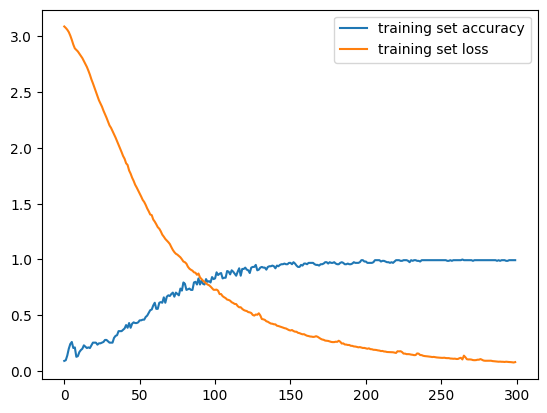

In [13]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [ ]:
import string
import random
while True:
  texts_p=[]
  prediction_input=input('YOU : ')
  prediction_input=[letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input=''.join(prediction_input)
  texts_p.append(prediction_input)
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input=np.array(prediction_input).reshape(-1)
  prediction_input=pad_sequences([prediction_input],input_shape)

  output=model.predict(prediction_input)
  output = output.argmax()

  response_tag = le.inverse_transform([output])[0]
  print("CHATBOT : ",random.choice(responses[response_tag]))
  if response_tag == "farewell":
    break

YOU :  hi


1/1 [==============================] - 1s 556ms/step
CHATBOT :  Hi there! What brings you here?


YOU :  thanks


1/1 [==============================] - 0s 24ms/step
CHATBOT :  You're welcome! If you need further help, don't hesitate to ask.


YOU :  how can i get admission into sastra


1/1 [==============================] - 0s 32ms/step
CHATBOT :  Admissions to B.Tech. and 5-Year Integrated M.Tech. programs are based on JEE-Main and Class XII scores. There are specific streams for admission. For more details, visit the official admission page on the website.


YOU :  whats is the admission fee


1/1 [==============================] - 0s 41ms/step
CHATBOT :  Branch sliding is based on your academic performance in the first year. Specific criteria are applied for sliding, and it depends on the availability of seats in the desired branch.


YOU :  what is the fee for admission


1/1 [==============================] - 0s 30ms/step
CHATBOT :  The admission fee is approximately 600-700 rupees.


YOU :  how much land does the sastra has


1/1 [==============================] - 0s 38ms/step
CHATBOT :  No, you don't need separate applications for Stream 1 and Stream 2. Use the same application form and provide relevant details for both streams.


YOU :  sastra collage area


1/1 [==============================] - 0s 32ms/step
CHATBOT :  Glad I could assist! If you have more questions, feel free to reach out.
